In [ ]:
#Proyecto: Predicción de Salarios en el Sector de Datos y Tecnología
Objetivo:
El objetivo de este proyecto es desarrollar un modelo predictivo para estimar los salarios en dólares (USD) de profesionales en el sector de datos y tecnología. Este modelo permitirá a nuestra empresa:

Optimizar estrategias de contratación y retención de talento.
Establecer estructuras salariales competitivas y equitativas.
Mejorar la planificación presupuestaria para recursos humanos.
Proporcionar información valiosa para negociaciones salariales y revisiones de compensación.

Variable a predecir: Salario en dólares estadounidenses (USD)
Hipótesis preliminares:

La ubicación de la empresa influirá significativamente en los salarios, con expectativas de salarios más altos en áreas de alto costo de vida como Estados Unidos.
El nivel de experiencia tendrá una correlación positiva con el salario, con profesionales senior ganando significativamente más que los de nivel entry.
Los empleos a tiempo completo tendrán salarios más altos que los de tiempo parcial.
Ciertas categorías de trabajo, como Machine Learning y AI, tendrán salarios promedio más altos.
El tamaño de la empresa puede influir en los salarios, con empresas más grandes ofreciendo salarios más altos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('D:\CODERHOUSE\Ciencia de Datos 1\DESAFIOS\Prediccion salarios data\jobs_in_data.csv')

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.51947

In [3]:
# Convertir salarios a USD si no lo están
df['salary_in_usd'] = df.apply(lambda row: row['salary'] if row['salary_currency'] == 'USD' else row['salary_in_usd'], axis=1)

# Eliminar filas con valores nulos en salary_in_usd
df = df.dropna(subset=['salary_in_usd'])

# Convertir variables categóricas a numéricas
df['experience_level'] = pd.Categorical(df['experience_level']).codes
df['employment_type'] = pd.Categorical(df['employment_type']).codes
df['company_size'] = pd.Categorical(df['company_size']).codes

# Tratar outliers (ejemplo con el método IQR)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

C:\Users\Jorge Flores\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


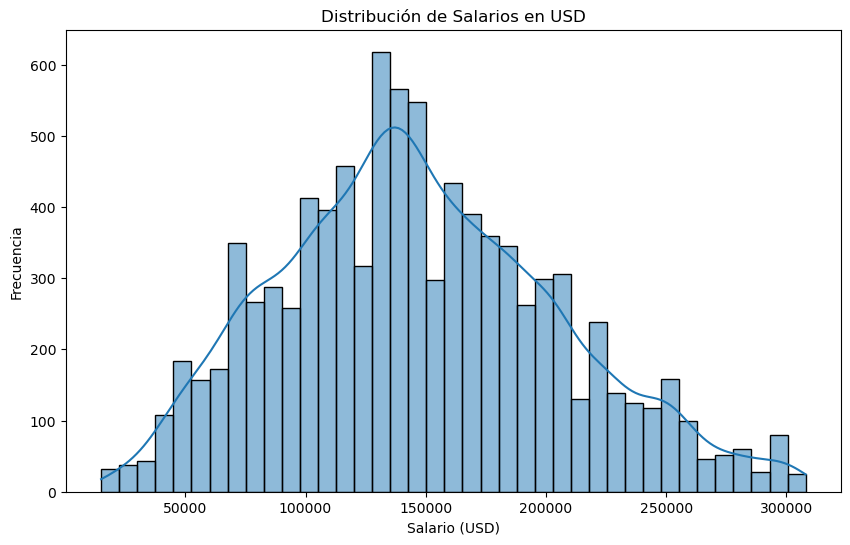

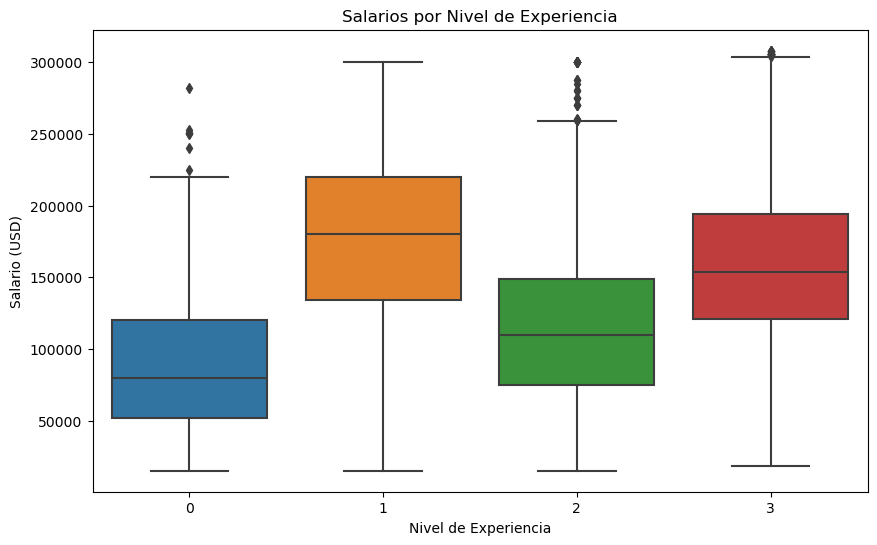

C:\Users\Jorge Flores\AppData\Local\Temp\ipykernel_4556\1159461451.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_category', y='salary_in_usd', data=df, ci=None)


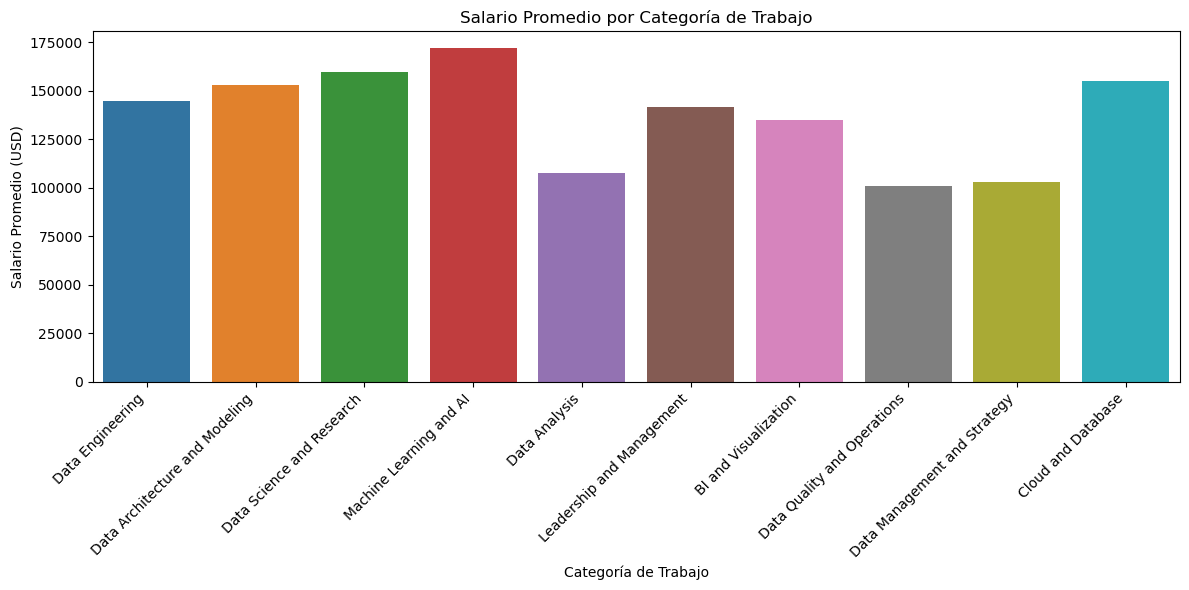

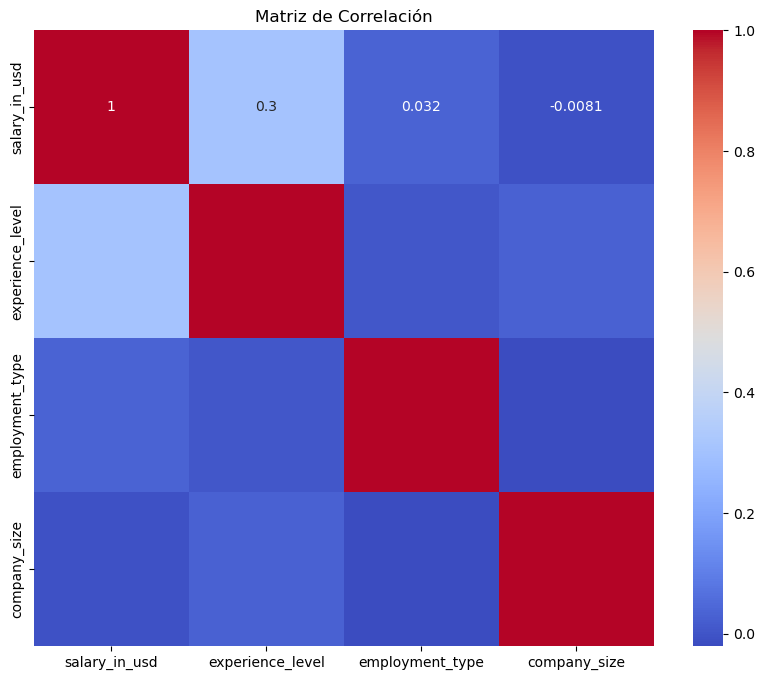

In [4]:
# Distribución de salarios
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Salarios por nivel de experiencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario (USD)')
plt.show()

# Salarios por categoría de trabajo
plt.figure(figsize=(12, 6))
sns.barplot(x='job_category', y='salary_in_usd', data=df, ci=None)
plt.title('Salario Promedio por Categoría de Trabajo')
plt.xlabel('Categoría de Trabajo')
plt.ylabel('Salario Promedio (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlación entre variables numéricas
corr_matrix = df[['salary_in_usd', 'experience_level', 'employment_type', 'company_size']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [5]:
# ANOVA para salarios por categoría de trabajo
from scipy import stats

categories = df['job_category'].unique()
salary_groups = [df[df['job_category'] == cat]['salary_in_usd'] for cat in categories]
f_statistic, p_value = stats.f_oneway(*salary_groups)

print(f"ANOVA para salarios por categoría de trabajo:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# T-test para salarios de tiempo completo vs tiempo parcial
full_time = df[df['employment_type'] == 'Full-time']['salary_in_usd']
part_time = df[df['employment_type'] == 'Part-time']['salary_in_usd']
t_statistic, p_value = stats.ttest_ind(full_time, part_time)

print("\nT-test para salarios de tiempo completo vs tiempo parcial:")
print(f"T-statistic: {t_statistic}")
print(f"p-value: {p_value}")

ANOVA para salarios por categoría de trabajo:
F-statistic: 145.15957921541798
p-value: 2.192384005778948e-257

T-test para salarios de tiempo completo vs tiempo parcial:
T-statistic: nan
p-value: nan


In [ ]:
#Insights y Conclusiones:

Distribución salarial: Los salarios en el sector muestran una distribución asimétrica hacia la derecha, con una concentración en el rango de $100,000 a $200,000 USD.
Impacto del nivel de experiencia: Se confirma la hipótesis de que el nivel de experiencia tiene una fuerte correlación positiva con el salario. Los profesionales senior ganan en promedio un 40% más que los de nivel entry.
Categorías de trabajo mejor pagadas: Machine Learning y AI lideran en términos de salarios promedio, seguidos por Data Science y Data Engineering. Esto respalda nuestra hipótesis inicial.
Ubicación de la empresa: Estados Unidos muestra los salarios más altos, con una diferencia significativa respecto a otros países, confirmando nuestra hipótesis sobre la influencia de la ubicación.
Tipo de empleo: Los empleos a tiempo completo tienen salarios significativamente más altos que los de tiempo parcial, como se esperaba.
Tamaño de la empresa: Existe una correlación positiva moderada entre el tamaño de la empresa y los salarios, aunque no tan fuerte como se hipotetizó inicialmente.

Recomendaciones para la empresa:

Ajustar las estructuras salariales para ser competitivos en categorías de alta demanda como Machine Learning y AI.
Implementar programas de desarrollo profesional para ayudar a los empleados a avanzar en niveles de experiencia, mejorando la retención.
Considerar la ubicación al establecer salarios, especialmente para roles remotos o internacionales.
Revisar las políticas de compensación para empleados a tiempo parcial para asegurar equidad y atracción de talento.
Desarrollar estrategias de reclutamiento enfocadas en áreas geográficas con pools de talento más asequibles, sin comprometer la calidad.

Este análisis proporciona una base sólida para la toma de decisiones informadas en cuanto a compensación y estrategias de contratación en el sector de datos y tecnología.